# Qiskit: Basics on Python and Quantum Computing
### By: Javier Orduz
### Submitted By: Pratik Siwakoti

## Quantum Hello world!

We import the libraries or modules

In [1]:
!pip3 install qiskit==0.36.0
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install pylatexenc


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached qiskit_terra-0.20.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.21.0
    Uninstalling qiskit-terra-0.21.0:
      Successfully uninstalled qiskit-terra-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-runtime 0.6.2 requires qiskit-terra>=0.21.0, but you have qiskit-terra 0.20.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached qiskit_terra-0.21.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.7 MB)
  Attempting uninstall: qiskit-te

In [2]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

python version:  3.7.13
qiskit==0.36.0
qiskit-aer==0.10.4
qiskit-ibm-runtime==0.6.2
qiskit-ibmq-provider==0.19.0
qiskit-ignis==0.7.0
qiskit-terra==0.21.0


In [3]:
from qiskit import *

We introduce a line to draw the graphs in the nb

In [4]:
%matplotlib inline

We introduce the next line to know more about the environment.

In [5]:
!pip3 freeze | grep qiskit 

qiskit==0.36.0
qiskit-aer==0.10.4
qiskit-ibm-runtime==0.6.2
qiskit-ibmq-provider==0.19.0
qiskit-ignis==0.7.0
qiskit-terra==0.21.0


We create the quantum and classical registers

In [6]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

To add the last registers in the circuit

In [7]:
circuit = QuantumCircuit(qr,cr)

We draw the circuit through two ways
1. basic

In [8]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

2. medium

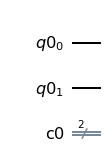

In [9]:
circuit.draw(output='mpl')

## Example

In [10]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')
circuit = QuantumCircuit(qr,cr)
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

## Apply a gate in the circuit

We apply the Hadamard gate (H-gate is _superposition_ same probability):
1. circuit.h(qr): for all quantum registers
2. circuit.h(qr[i]): for the i-quantum register.

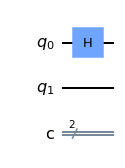

In [11]:
circuit.h(qr[0])
circuit.draw(output='mpl')

## Multiqbit Gates

We add the X-gate (control not or control-X, which is entanglement):
1. circuit.cx[qr[0],qr[1]].

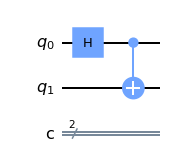

In [12]:
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

Now, we measure:

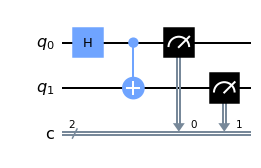

In [13]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

### Concepts

1. Backend is the environment where we can simulate one quantum computer.
2. Pay (time or money) in the tons of works before yours.

## Some quantum computers:
- ibmq_16_melbourne
- ibmq_london
- etc.

We create the _backend_:

In [ ]:
bcknd = Aer.get_backend('qasm_simulator')

We execute and get the result:

In [ ]:
rslt = execute(circuit, backend=bcknd).result()

And call the modules/libraries to plot the histogram

In [ ]:
from qiskit.tools.visualization import plot_histogram

Draw the histogram

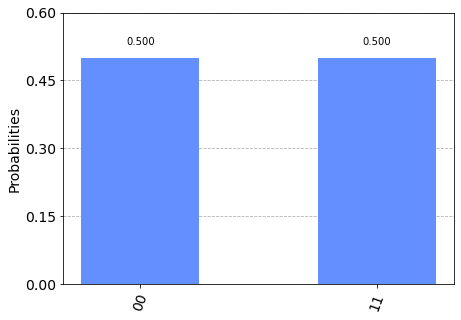

In [ ]:
plot_histogram(rslt.get_counts(circuit))

## How to use the Quantum Computer real

We are going to connect with ourself account (I changed my token, you should do same)

In [ ]:
IBMQ.save_account('z2zz4cz2dg68d40dgz86204d8048zdz2gcdgdz026098gzc9zddgzccz4d264zgddzccc49cd8zgg28c2zzzz6czcz84dz9g2z0668c2202zdzz6z9d20d2')

configrc.store_credentials:WARNING:2022-06-09 16:04:52,119: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

We can see different quantum computers to execute the algorithm/circuit.

In [ ]:
prvdr=IBMQ.get_provider(group='open')
prvdr.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

Remember it is important to know the quantum computer arqchitecture.
**Hint:** go to ref. 4 to see the jobs in the computing.

In [ ]:
prvdr=IBMQ.get_provider('ibm-q')
qcomp=prvdr.get_backend('ibmq_belem')

Execute the circuit in the quantum computer.

In [ ]:
job=execute(circuit, backend=qcomp)

import the tools to show the results

In [ ]:
from qiskit.tools.monitor import job_monitor

To know the job status.

In [ ]:
job_monitor(job)

Job Status: job has successfully run


Assign the result to new variable.

In [ ]:
rslt=job.result()

Draw the histogram

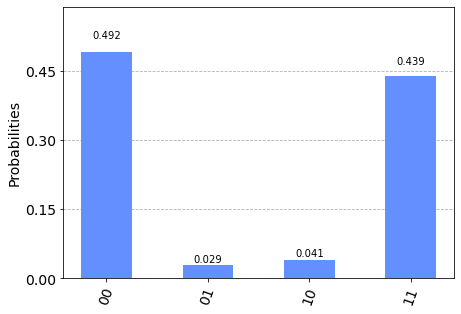

In [ ]:
plot_histogram(rslt.get_counts(circuit))

# Exercise

1. Use your account, and your token and re run this NB. 
2. Reproduce this NB with 3 qubits, use the simulator and the quantum computer.
3. Use another provider.
4. Compare and analyze your results. 
5. Write a report. Instructions during the course.

I left some gifs to help with the token and the provider selection.

<img src="../GIF/quantumIBM_token_a.gif" width="350" align="center">

<img src="../GIF/quantumIBM_token_B.gif" width="350" align="center">

In [ ]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

In [ ]:
# Replicating with 3 qubits

In [12]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

In [13]:
circuit = QuantumCircuit(qr,cr)

In [14]:
circuit.draw()

q1_0: 
      
q1_1: 
      
q1_2: 
      
c1: 3/

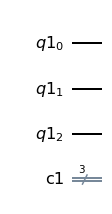

In [15]:
circuit.draw(output='mpl')

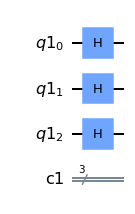

In [16]:
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])

circuit.draw(output='mpl')

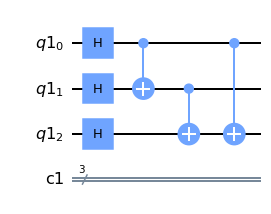

In [17]:
circuit.cx(qr[0],qr[1])
circuit.cx(qr[1],qr[2])
circuit.cx(qr[0],qr[2])
circuit.draw(output='mpl')

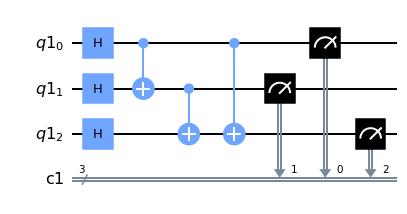

In [18]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

In [19]:
bcknd = Aer.get_backend('qasm_simulator')

In [20]:
rslt = execute(circuit, backend=bcknd).result()

In [21]:
from qiskit.tools.visualization import plot_histogram

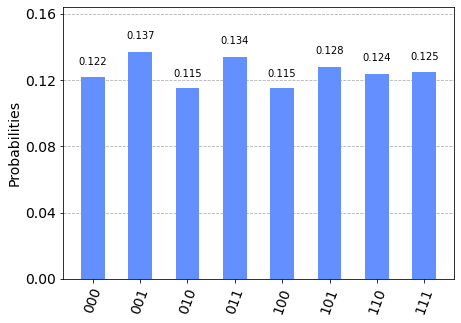

In [22]:
plot_histogram(rslt.get_counts(circuit))

**Report:**
My IBM token# 2a02a07fe5d2031b6e950ec456bcfe07ddcb37f644876cdda4df6ef42fb257946607a195df6902d28d96e298ea0694219b386be67f3bb72807d1d9c350c66fce6387fe5d2031b6e950ec456bcfe07ddcb37f644876cdda4df6ef42fb257946607a195df6902d28d96e298ea0694219b386be67f3bb72807d1d9c350c66fce638

I replicated the same circuit using the IBM Quantum Composer as we discusssed in class. The IBM Quantum Composer provides a user friendly interface for students and researchers to play with Quantum Computing. The interface provides the ability to create registers and options to add operations, along with a probability plot and c-sphere representation to view results. These are only some features of the IBM Quantum Composer, and it only has some features.



# References


1. Qiskit tutorial: https://qiskit.org/documentation/install.html
2. Github tutorial: https://github.com/Qiskit/qiskit-iqx-tutorials
3. youtube video: https://www.youtube.com/watch?v=L4jYKGrxKRE&feature=youtu.be
4. IBM account: https://quantum-computing.ibm.com/
<!--
https://quantum-computing.ibm.com/
My count with gmail in ciencias.unam
and Github
-->